In [3]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Number of Tweets 

In [4]:
%cypher MATCH (n:tweet) RETURN count(n) as Tweets

1 rows affected.


Tweets
1226015


## Number of users

In [5]:
%cypher MATCH (n:user) RETURN count(n) as Users

1 rows affected.


Users
660311


## Number of urls 

In [6]:
%cypher MATCH (n:url) RETURN count(n) as Urls

1 rows affected.


Urls
214113


## Number of tags

In [7]:
%cypher MATCH (n:hashtag) RETURN count(n) as Tags

1 rows affected.


Tags
37235


## Top 10 tweets

In [8]:
%%cypher
match  (n:tweet)<-[r :RETWEETS|:QUOTED_TO|:REPLIES_TO]-()
with n, count(r) as deg order by deg desc limit 10
match (n)<-[:TWEETS]-(u:user)
return n.tid as TID, substring(n.text, 0, 100000) as Tweets, 
       u.screen_name as User, u.name as Name, n.created_at as Date, deg as Degree, n.eco as Ecosystem

11 rows affected.


TID,Tweets,User,Name,Date,Degree,Ecosystem
997110277547220993,•Ohio—the State where a black child Tamir Rice was executed for holding a toy gun—you brought a weapon of death to school &amp; got Nat’l TV spots •That disparity is racism against Tamir &amp; white privilege for you •Please learn the difference #GunControlNow https://t.co/VBgaKmLvAr,MuslimIQ,"Qasim Rashid, Esq.",Thu May 17 13:43:10 +0000 2018,114359,BLM
997110277547220993,•Ohio—the State where a black child Tamir Rice was executed for holding a toy gun—you brought a weapon of death to school &amp; got Nat’l TV spots •That disparity is racism against Tamir &amp; white privilege for you •Please learn the difference #GunControlNow https://t.co/VBgaKmLvAr,MuslimIQ,"Qasim Rashid, Esq.",Thu May 17 13:43:10 +0000 2018,114359,BLM
997112115789025280,Black people continue to be killed because the police THINK they’re armed. She brings a rifle to campus and gets a tv platform. Yet she thinks people using the term “white privilege” is racist. My head is spinning https://t.co/uzBUeMFos7,OdehEveryday,Abe,Thu May 17 13:50:28 +0000 2018,97686,GC
1006278364708077569,"The entire premise of #metoo is that women are stupid, weak &amp; inconsequential. Too stupid to know what men might want if you come to their hotel room late at night. Too weak to turn around and tell someone not to touch your ass again. Too inconsequential to realize this.",RealCandaceO,Candace Owens,Mon Jun 11 20:53:52 +0000 2018,9361,MT
997552686278041602,"Florida high school student Emma Gonzalez has shown more moral courage than the GOP and the NRA put together. RETWEET if stand with Emma as she demands gun reform from Congress and the President after the the Santa Fe, Texas shooting! #GunControlNow https://t.co/7vs4ByBqnE",DisavowTrump20,Protect Robert Mueller ✊,Fri May 18 19:01:08 +0000 2018,8579,GC
1001873764664139776,Janelle Monae is my baby muva!! ude02♥️udc9c https://t.co/TaN27uVinI https://t.co/H0XvrMGPTo,The_Monae,Janelle's Hair,Wed May 30 17:11:34 +0000 2018,7350,MT
997599793915494401,I’m devasted to learn that among the 10 innocent children murdered today was Sabika Sheikh—a Pakistani exchange student. She came here to learn—leaving her family thousands of miles behind—and we failed her. Inna lillahai wa inna illahi rajaeoonude13 #SantaFeHigh #GunControlNow https://t.co/jPe1hU4MQ5,MuslimIQ,"Qasim Rashid, Esq.",Fri May 18 22:08:20 +0000 2018,7120,GC
997483264154701824,All of these countries have mental illness &amp; video games. They also have #GunControl No. of mass shootings in 2018 (as of 15 May): via @ChrisLutolf udde6uddfa 0 uddf3uddff 0 udde9uddea 0 uddecudde7 0 udde7uddea 0 udde6uddf9 0 udde9uddf0 0 uddf3uddf1 0 uddf8uddea 0 uddebuddee 0 uddeeuddea 0 udde8udde6 0 uddf1uddfa 0 udde8udded 0 uddfauddf8 99* Santa Fe High School,pinklionheart,#OrlandoStrong\udd6f️❤️\udff3️‍\udf08,Fri May 18 14:25:17 +0000 2018,6618,GC
1002721656245137409,HAPPY PRIDE MONTH udf08udf37udf3audd16 https://t.co/4z3oQeNgis,JanelleMonae,"Janelle Monáe, Cindi",Sat Jun 02 01:20:47 +0000 2018,6268,MT
1001997598071377922,Breaking! ILLINOIS JUST RATIFIED THE EQUAL RIGHTS AMENDMENT. We now have 37 states that have ratified the ERA. 1 more to go. #ERANOW #MeToo,Alyssa_Milano,Alyssa Milano,Thu May 31 01:23:38 +0000 2018,6214,MT


## Top 5 tweets de BlackLivesMatter

In [9]:
%%cypher
match  (n:tweet)<-[r :RETWEETS|:QUOTED_TO|:REPLIES_TO]-() where n.eco='BLM' 
with n, count(r) as deg order by deg desc 
match (n)<-[:TWEETS]-(u:user)
return n.tid as TID, substring(n.text, 0, 100000) as Tweets, 
       u.screen_name as User, u.name as Name, n.created_at as Date, deg as Degree limit 5

5 rows affected.


TID,Tweets,User,Name,Date,Degree
997110277547220993,•Ohio—the State where a black child Tamir Rice was executed for holding a toy gun—you brought a weapon of death to school &amp; got Nat’l TV spots •That disparity is racism against Tamir &amp; white privilege for you •Please learn the difference #GunControlNow https://t.co/VBgaKmLvAr,MuslimIQ,"Qasim Rashid, Esq.",Thu May 17 13:43:10 +0000 2018,114359
997110277547220993,•Ohio—the State where a black child Tamir Rice was executed for holding a toy gun—you brought a weapon of death to school &amp; got Nat’l TV spots •That disparity is racism against Tamir &amp; white privilege for you •Please learn the difference #GunControlNow https://t.co/VBgaKmLvAr,MuslimIQ,"Qasim Rashid, Esq.",Thu May 17 13:43:10 +0000 2018,114359
1005327667057422337,"(ICYMI) ""Larry Elder: Four (Black) Cops Killed in Seven Days --Where's the Outrage?"" https://t.co/Mq7xAJOye2 #BlackLivesMatter",larryelder,Larry Elder,Sat Jun 09 05:56:08 +0000 2018,2542
994652039916466176,Witnessing a black student taking a nap in their own dorm building is not a legitimate reason to call the police. It’s time for America to reckon with the dangerous assumption that black people don’t “belong.” #BlackLivesMatter https://t.co/vaV90a0Gj9,ACLU,ACLU,Thu May 10 18:55:00 +0000 2018,1112
994344303672614912,#FBR party LIKE❤ RT♻️ FOLLOW ALL WHO RTudf0a #TheResistance #Resistance #ImpeachTrump #NotMyPresident #Resist #Trump #DemForce #BlueWave #Iran #BlueTsunami #FBR #LGBT #Equality #StrongerTogether #FBResistance #BlackLivesMatter #WomensRights #MuellerInvestigation #TrumpRussia https://t.co/VIhWKOI9v1,Dax_x98,DΔX™,Wed May 09 22:32:10 +0000 2018,966


## Top tweets de MeToo

In [10]:
%%cypher
match  (n:tweet)<-[r :RETWEETS|:QUOTED_TO|:REPLIES_TO]-()  where n.eco='MT' 
with n, count(r) as deg order by deg desc
match (n)<-[:TWEETS]-(u:user) 
return n.tid as TID, substring(n.text, 0, 100000) as Tweets, 
       u.screen_name as User, u.name as Name, n.created_at as Date, deg as Degree limit 5

5 rows affected.


TID,Tweets,User,Name,Date,Degree
1006278364708077569,"The entire premise of #metoo is that women are stupid, weak &amp; inconsequential. Too stupid to know what men might want if you come to their hotel room late at night. Too weak to turn around and tell someone not to touch your ass again. Too inconsequential to realize this.",RealCandaceO,Candace Owens,Mon Jun 11 20:53:52 +0000 2018,9361
1001873764664139776,Janelle Monae is my baby muva!! ude02♥️udc9c https://t.co/TaN27uVinI https://t.co/H0XvrMGPTo,The_Monae,Janelle's Hair,Wed May 30 17:11:34 +0000 2018,7350
1002721656245137409,HAPPY PRIDE MONTH udf08udf37udf3audd16 https://t.co/4z3oQeNgis,JanelleMonae,"Janelle Monáe, Cindi",Sat Jun 02 01:20:47 +0000 2018,6268
1001997598071377922,Breaking! ILLINOIS JUST RATIFIED THE EQUAL RIGHTS AMENDMENT. We now have 37 states that have ratified the ERA. 1 more to go. #ERANOW #MeToo,Alyssa_Milano,Alyssa Milano,Thu May 31 01:23:38 +0000 2018,6214
999084744359854080,日大の案件、MeToo的な流れになっていくんじゃないかと思ってはいる。たぶんその前にもやっていただろうし、もしかすると他のチームや競技でも似たような案件はあるだろう。当然他大学のスポーツ以外のことまで含めてね。いい機会なんじゃないですかね。,nasastar,nasastar,Wed May 23 00:28:59 +0000 2018,5779


# Top tweets de Climate Change

In [11]:
%%cypher
match  (n:tweet)<-[r :RETWEETS|:QUOTED_TO|:REPLIES_TO]-()  where n.eco='CCH' 
with n, count(r) as deg order by deg desc
match (n)<-[:TWEETS]-(u:user) 
return n.tid as TID, substring(n.text, 0, 100000) as Tweets, 
       u.screen_name as User, u.name as Name, n.created_at as Date, deg as Degree limit 5

5 rows affected.


TID,Tweets,User,Name,Date,Degree
994194495074947072,The artificial glacier that is providing fresh water to a village located in the Himalayas. A potential game changing innovation that could combat the effects of climate change. #tech #innovation #climatechange https://t.co/iZwxppNwxY,PrecisionHomes_,Precision Homes,Wed May 09 12:36:53 +0000 2018,577
992438365336276993,CLIMATECHANGE GLOBALCHALLENGE https://t.co/h9tRfYHm08,SchneiderDallas,Dallas D.Schneider,Fri May 04 16:18:39 +0000 2018,454
994503706220683267,"Thread of the day: Techno-economically, #Nuclear could pretty much stop #climatechange. We need to stop lamenting how hard it is to build because it's politically unpopular (circular argument) and instead start making it more popular. Inherently it's an awesome tech. Here's why:",Kaikenhuippu,Rauli Partanen,Thu May 10 09:05:35 +0000 2018,350
994744400264785920,"“We don’t have unlimited time,” “Do we or don’t we care about our grandchildren? We’ve been stealing their future.” #ActOnClimate #ClimateChange #KeepItInTheGround https://t.co/bsv7hW6s9g",PaulEDawson,Paul Dawson,Fri May 11 01:02:01 +0000 2018,333
962044874898878466,"SET is a new #cryptocurrency #token whose underlying value is derived by addressing today's environmental pollution concerns, #climatechange effects &amp; health &amp; fitness levels of the global populace. Read the whitepaper to know more https://t.co/fuysAmsJFL",settoken,SET (Save Environment Token),Fri Feb 09 19:25:46 +0000 2018,298


# Top tweets de GunControl

In [12]:
%%cypher
match  (n:tweet)<-[r :RETWEETS|:QUOTED_TO|:REPLIES_TO]-()  where n.eco='GC' 
with n, count(r) as deg order by deg desc
match (n)<-[:TWEETS]-(u:user) 
return n.tid as TID, substring(n.text, 0, 100000) as Tweets, 
       u.screen_name as User, u.name as Name, n.created_at as Date, deg as Degree limit 5

5 rows affected.


TID,Tweets,User,Name,Date,Degree
997112115789025280,Black people continue to be killed because the police THINK they’re armed. She brings a rifle to campus and gets a tv platform. Yet she thinks people using the term “white privilege” is racist. My head is spinning https://t.co/uzBUeMFos7,OdehEveryday,Abe,Thu May 17 13:50:28 +0000 2018,97686
997552686278041602,"Florida high school student Emma Gonzalez has shown more moral courage than the GOP and the NRA put together. RETWEET if stand with Emma as she demands gun reform from Congress and the President after the the Santa Fe, Texas shooting! #GunControlNow https://t.co/7vs4ByBqnE",DisavowTrump20,Protect Robert Mueller ✊,Fri May 18 19:01:08 +0000 2018,8579
997599793915494401,I’m devasted to learn that among the 10 innocent children murdered today was Sabika Sheikh—a Pakistani exchange student. She came here to learn—leaving her family thousands of miles behind—and we failed her. Inna lillahai wa inna illahi rajaeoonude13 #SantaFeHigh #GunControlNow https://t.co/jPe1hU4MQ5,MuslimIQ,"Qasim Rashid, Esq.",Fri May 18 22:08:20 +0000 2018,7120
997483264154701824,All of these countries have mental illness &amp; video games. They also have #GunControl No. of mass shootings in 2018 (as of 15 May): via @ChrisLutolf udde6uddfa 0 uddf3uddff 0 udde9uddea 0 uddecudde7 0 udde7uddea 0 udde6uddf9 0 udde9uddf0 0 uddf3uddf1 0 uddf8uddea 0 uddebuddee 0 uddeeuddea 0 udde8udde6 0 uddf1uddfa 0 udde8udded 0 uddfauddf8 99* Santa Fe High School,pinklionheart,#OrlandoStrong\udd6f️❤️\udff3️‍\udf08,Fri May 18 14:25:17 +0000 2018,6618
998487356217868288,You’re a good egg @kelly_clarkson ude4cude4cude4c #GunControlNow https://t.co/z7aiBDHyzZ,dylanobrien,Dylan O'Brien,Mon May 21 08:55:11 +0000 2018,5146


## Top users most mentioned in tweets

In [13]:
%cypher match (n:user)<-[r:MENTIONS]-() return n.uid as ID, n.screen_name as User, n.name as Name, count(r) as Degree, n.eco as Ecosystem order by Degree desc limit 15

15 rows affected.


ID,User,Name,Degree,Ecosystem
776694775,OdehEveryday,Abe,97684,GC
85583894,MuslimIQ,"Qasim Rashid, Esq.",20213,GC
878247600096509952,RealCandaceO,Candace Owens,18470,GC
25073877,realDonaldTrump,Donald J. Trump,17342,GC
772958490356617216,DisavowTrump20,Protect Robert Mueller ✊,11392,GC
21829541,NRA,NRA,9209,GC
26642006,Alyssa_Milano,Alyssa Milano,7496,GC
11134252,GOP,GOP,7252,GC
12266442,JanelleMonae,"Janelle Monáe, Cindi",6298,MT
1462969034,pinklionheart,#OrlandoStrong\udd6f️❤️\udff3️‍\udf08,6195,GC


## Top Urls

In [14]:
top_urls = %cypher match (n:url)-[r]-(m) return n.urlid, substring(n.url, 0, 10000000) as URL, count(r) as Uses order by Uses desc

214113 rows affected.


In [15]:
pd.set_option('display.max_colwidth', -1)
top_urls.get_dataframe().head(10)

,n.urlid,URL,Uses
0,u15303,https://twitter.com/the_monae/status/1001873764664139776,6420
1,u145764,https://twitter.com/alyssa_milano/status/998398079798669312,5066
2,u143051,https://twitter.com/muslimiq/status/997110277547220993,2556
3,u12188,http://www.elderstatement.com/2015/03/four-black-cops-killed-in-seven-days.html,2381
4,m16532,https://twitter.com/QpxnD2OdqXZHMv3/status/1005886179881857024/photo/1,1813
5,u56166,https://www.amazon.com/dp/B07CVBJCD1,1362
6,u38263,https://twitter.com/lightskinhero/status/999799263105376257,1217
7,u40380,http://joy105.com/index.php/2018/05/24/senate-passes-bill-to-revamp-sexual-harassment-policies-in-wake-of-metoo-movement/,1195
8,u56155,https://www.amazon.com/dp/B07D9TJ5RT,1171
9,u144103,https://twitter.com/DeepNotion20/status/997715550150254593,1153


## Number of tweets by language

In [16]:
#El idioma de los tweets es identificado por Twitter automáticamente.

In [17]:
top_languages = %cypher match (n:tweet) where n.lang is not null return distinct n.lang as Language, count(n.lang) as Number_of_tweets order by Number_of_tweets desc

52 rows affected.


In [18]:
et = top_languages.get_dataframe().replace('eu', 'Basque').replace('el', 'Greek').replace('iw', 'Hebrew').replace('in', 'Indonesian').replace('es', 'Spanish').replace('en', 'English').replace('pt', 'Portuguese').replace('it', 'Italian').replace('fr', 'French').replace('und', 'No Language Detected').replace('tr', 'Turkish').replace('tl', 'Tagalog').replace('de', 'German').replace('nl', 'Dutch').replace('sv', 'Swedish').replace('ht', 'Swedish').replace('ro', 'Romanian').replace('da', 'Danish').replace('lt', 'Lithuanian').replace('pl', 'Polish').replace('et', 'Estonian').replace('cs', 'Czech').replace('fi', 'Finnish').replace('ja', 'Japanese').replace('no', 'Norwegian').replace('lv', 'Latvian').replace('cy', 'Welsh').replace('ar', 'Arabic').replace('is', 'Icelandic').replace('ru', 'Russian').replace('hu', 'Hungarian').replace('zh', 'Chinese').replace('sl', 'Slovenian').replace('hi', 'Hindi').replace('bg', 'Bulgarian').replace('ta', 'Tamil').replace('vi', 'Vietnamese').replace('ko', 'Korean').replace('sk', 'Slovak').replace('ur', 'Urdu').replace('sr', 'Serbian').replace('fa', 'Persian').replace('bs', 'Bosnian').replace('hr', 'Croatian').replace('th', 'Thai').replace('uk', 'Ukrainian').replace('bn', 'Bengali').replace('te', 'Telugu').replace('sl','Slovenian').replace('ne', 'Nepali').replace('hy', 'Armenian').replace('mr', 'Marathi').replace('ka', 'Georgian')   
et = et.set_index('Language')
et

,Number_of_tweets
Language,
English,944322
No Language Detected,58133
Japanese,57579
Persian,36952
Korean,23488
Spanish,14452
French,12916
Thai,8208
Swedish,6458


## Graphic of 10 top languages excluding Spanish and 'Not Language Detected' tweets

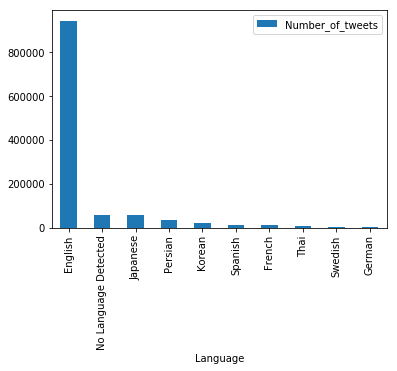

In [19]:
et[:10].plot(kind='bar')

## Number of tweets by country

In [20]:
top_countries = %cypher match (n:tweet) where n.country is not null return distinct n.country as Country, count(n.country) as Number_of_tweets order by Number_of_tweets desc

170 rows affected.


In [21]:
c_df = top_countries.get_dataframe().replace('Estados Unidos', 'United States').replace('Espanya', 'Spain').replace('España', 'Spain').replace('México', 'Mexico').replace('Canadá', 'Canada').replace('Suecia', 'Sweden').replace('Sverige', 'Sweden').replace('België','Belgium').replace('Bélgica','Belgium').replace('Россия', 'Russia').replace('Rusia', 'Russia').replace('Deutschland', 'Germany').replace('Francia', 'France').replace('Italia', 'Italy').replace('Panamá', 'Panama').replace('Alemania', 'Germany').replace('Reino Unido', 'United Kingdom').replace('Brasil', 'Brazil').replace('Holanda', 'Holland').replace('Nederland', 'Holland').replace('The Netherlands', 'Holland').replace('Nederland', 'Holland').replace('Espainia', 'Spain').replace('Espagne', 'Spain').replace('Espanha', 'Spain').replace('Messico', 'Mexico').replace('Suiza', 'Switzerland').replace('Bolivien', 'Bolivia').replace('USA', 'United States').head(20)

c_df = c_df.groupby(['Country'])['Number_of_tweets'].sum()
c_df = c_df.reset_index().sort_values(by='Number_of_tweets', ascending=False)
total_tweets = %cypher MATCH (n:tweet) RETURN count(n) as Tweets
total_tweets = total_tweets.get_dataframe()
total_tweets = total_tweets['Tweets'][0]
c_df['Percentage (%)'] = (c_df['Number_of_tweets']/total_tweets)*100
c_df

1 rows affected.


,Country,Number_of_tweets,Percentage (%)
15,United States,9193,0.749828
14,United Kingdom,1093,0.089151
1,Canada,465,0.037928
0,Australia,264,0.021533
16,日本,210,0.017129
3,Germany,105,0.008564
5,India,101,0.008238
2,France,95,0.007749
13,Sweden,89,0.007259
4,Holland,79,0.006444


# Graphic of 20 top countries

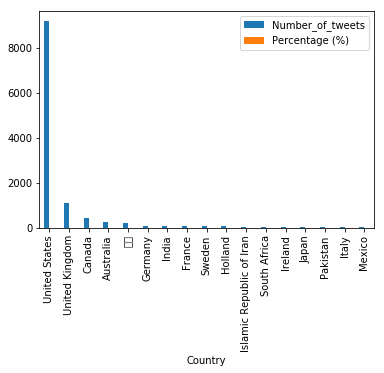

In [22]:
c_df.set_index("Country")[0:21].plot(kind="bar")

  ## Number of tweets by city

In [23]:
top_locs = %cypher match (n:tweet) where (n.full_name is not null) return distinct n.full_name as City, count(n.full_name) as Number_of_tweets order by Number_of_tweets desc

3366 rows affected.


In [24]:
df = top_locs.get_dataframe().groupby('City').sum().sort_values( by ='Number_of_tweets', ascending = 0)
df.head(20)

,Number_of_tweets
City,
United Kingdom,515
"Los Angeles, CA",379
"Manhattan, NY",335
"Washington, DC",217
"Houston, TX",151
"Oak Lawn, IL",141
"Texas, USA",138
"Chicago, IL",136
"Florida, USA",134


## Graphic of top 20  cities

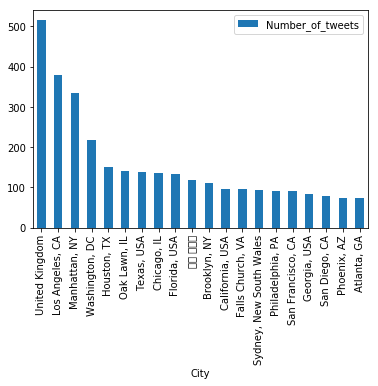

In [25]:
locs_df = df.head(21)
locs_df[0:20].plot(kind="bar")

## Top US Cities 

In [26]:
us_cities = %cypher match (t:tweet) where t.country = "United States" return distinct t.full_name as City, count(*) as Number_of_tweets order by Number_of_tweets desc

2160 rows affected.


In [27]:
df = us_cities.get_dataframe().groupby('City').sum().sort_values( by ='Number_of_tweets', ascending = 0)
df.head(21)

,Number_of_tweets
City,
"Los Angeles, CA",378
"Manhattan, NY",325
"Washington, DC",216
"Houston, TX",150
"Oak Lawn, IL",141
"Texas, USA",137
"Chicago, IL",136
"Florida, USA",132
"Brooklyn, NY",110


## Graphic of top 20 US Cities

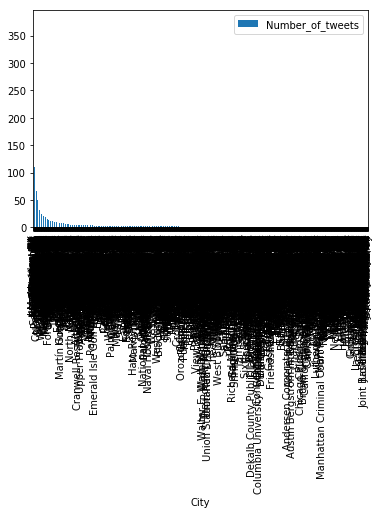

In [28]:
df.plot(kind="bar")